(256, 256, 3)


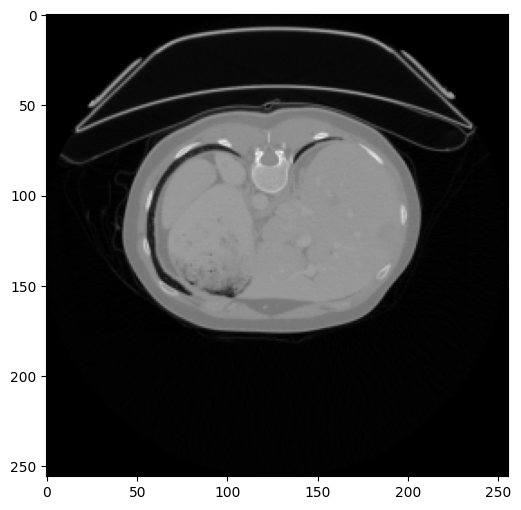

(256, 256, 3)


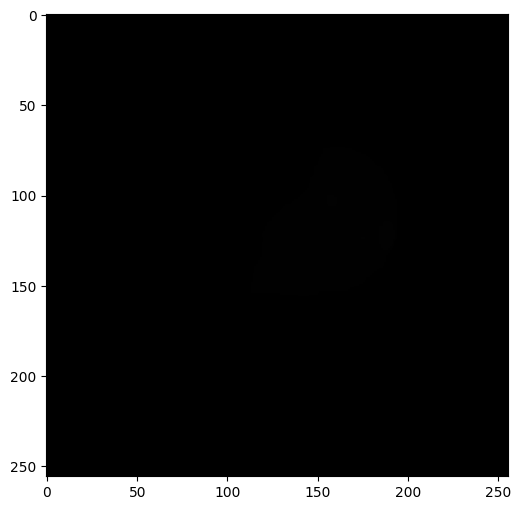

(256, 256, 3)


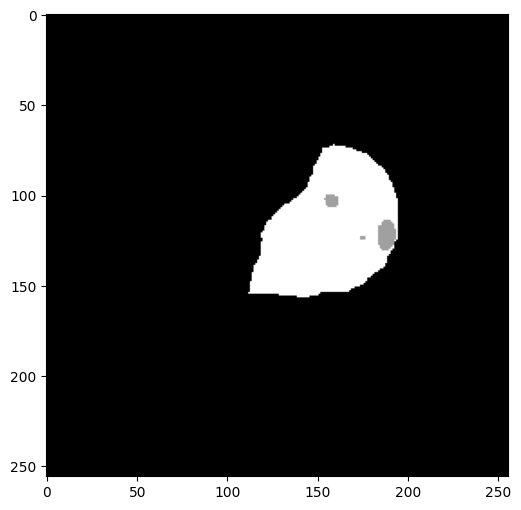

In [4]:
import mmcv
import mmengine
import matplotlib.pyplot as plt

#path = "C:/Users/marys/Desktop/PROJEKT BADAWCZY/dane/prepared_data/volumes/volume-49_149.png" 
#path_label = "C:/Users/marys/Desktop/PROJEKT BADAWCZY/dane/prepared_data/volume_labels/segmentation-49_149.png" 
#path_seg = "C:/Users/marys/Desktop/PROJEKT BADAWCZY/dane/prepared_data/volume_labels/volume-49_149.png" 

path = "C:/Users/Użytkownik/Desktop/studia/MAGISTERKA/II sem/Projekt badawczy/projekt/data/dane/volumes/volume-49_149.png" 
path_label = "C:/Users/Użytkownik/Desktop/studia/MAGISTERKA/II sem/Projekt badawczy/projekt/data/dane/volume_labels/segmentation-49_149.png" 
path_seg = "C:/Users/Użytkownik/Desktop/studia/MAGISTERKA/II sem/Projekt badawczy/projekt/data/dane/volume_labels/volume-49_149.png" 


# path = "C:/Users/marys/Desktop/PROJEKT BADAWCZY/dane/prepared_data/volumes/volume-113_512.png" 
# path_label = "C:/Users/marys/Desktop/PROJEKT BADAWCZY/dane/prepared_data/volume_labels/segmentation-113_512.png" 
# path_seg = "C:/Users/marys/Desktop/PROJEKT BADAWCZY/dane/prepared_data/volume_labels/volume-113_512.png" 

img = mmcv.imread(path)
print(img.shape)
plt.figure(figsize=(8, 6))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

img = mmcv.imread(path_label)
print(img.shape)
plt.figure(figsize=(8, 6))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

img = mmcv.imread(path_seg)
print(img.shape)
plt.figure(figsize=(8, 6))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()


In [5]:
data_root = 'C:/Users/Użytkownik/Desktop/studia/MAGISTERKA/II sem/Projekt badawczy/projekt/data/dane'
img_dir = 'volumes'
ann_dir = 'volume_labels'

# define class and palette for better visualization
classes = ('other', 'liver', 'lesion')
palette = [[0, 0, 0], [255, 255, 255], [160, 160, 160]]

In [ ]:
# ZROBIĆ TYLKO RAZ I ZOSTAWIĆ ZAKOMENTOWANE, ŻEBY NIE TRACIC CZASU :)))
# JEST W PLIKU NA DYSKU WSZYSTKO

# import os
# import os.path as osp
# import numpy as np
# from PIL import Image

# # convert dataset annotation to semantic segmentation map
# for file in mmengine.scandir(osp.join(data_root, ann_dir)):
#     if "segmentation" in file:
#         seg_img = Image.open(osp.join(data_root, ann_dir, file)).convert('P')
#         seg_img.putpalette(np.array(palette, dtype=np.uint8))
#         seg_img.save(osp.join(data_root, ann_dir, file.replace('segmentation', 
#                                                             'volume')))

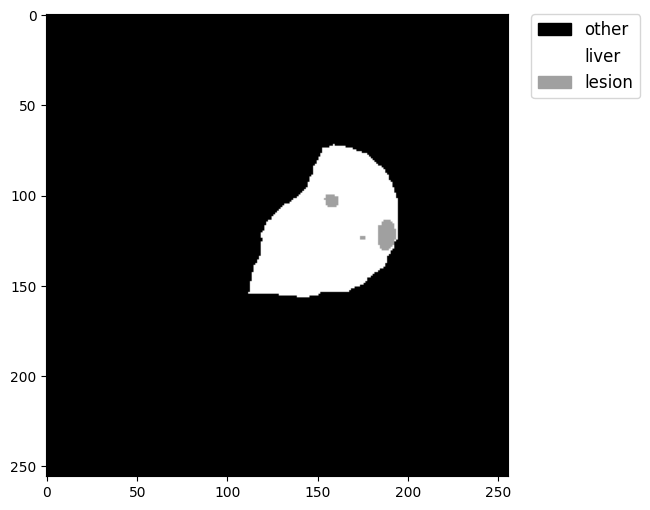

In [6]:
# Let's take a look at the segmentation map we got
import matplotlib.patches as mpatches
from PIL import Image
import numpy as np

img = Image.open(path_seg)
plt.figure(figsize=(8, 6))
im = plt.imshow(np.array(img.convert('RGB')))

# create a patch (proxy artist) for every color 
patches = [mpatches.Patch(color=np.array(palette[i])/255., 
                          label=classes[i]) for i in range(3)]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., 
           fontsize='large')

plt.show()

In [7]:
# split train/val/test set randomly
# w plikach splits wszystko powinno być zapisane jako volume

import os
import os.path as osp

split_dir = 'splits'
split_file = 'volume'

mmengine.mkdir_or_exist(osp.join(data_root, split_dir))
filename_list = [osp.splitext(filename)[0] for filename in mmengine.scandir(
    osp.join(data_root, ann_dir), suffix='.png') if split_file in filename]

with open(osp.join(data_root, split_dir, 'train.txt'), 'w') as f:
    # select first 3/5 as train set
    train_length = int(len(filename_list)*3/5)
    f.writelines(line + '\n' for line in filename_list[:train_length])

with open(osp.join(data_root, split_dir, 'val.txt'), 'w') as f:
    # select next 1/5 as val set
    val_length = int(len(filename_list)*4/5)
    f.writelines(line + '\n' for line in filename_list[train_length:])
    
with open(osp.join(data_root, split_dir, 'test.txt'), 'w') as f:
    # select last 1/5 as test set
    f.writelines(line + '\n' for line in filename_list[val_length:])

In [9]:
from mmseg.registry import DATASETS
from mmseg.datasets import BaseSegDataset


@DATASETS.register_module()
class LiverCancerDataset(BaseSegDataset):
    METAINFO = dict(classes = classes, palette = palette)
    def __init__(self, **kwargs):
        super().__init__(img_suffix='.png', seg_map_suffix='.png', **kwargs)

KeyError: 'LiverCancerDataset is already registered in dataset at __main__'

In [10]:
from mmengine import Config
cfg = Config.fromfile('C:/AnacondaEnvs/opensegmentation/mmsegmentation/configs/pspnet/pspnet_r50-d8_4xb2-40k_cityscapes-512x1024.py')
print(f'Config:\n{cfg.pretty_text}')

Config:
crop_size = (
    512,
    1024,
)
data_preprocessor = dict(
    bgr_to_rgb=True,
    mean=[
        123.675,
        116.28,
        103.53,
    ],
    pad_val=0,
    seg_pad_val=255,
    size=(
        512,
        1024,
    ),
    std=[
        58.395,
        57.12,
        57.375,
    ],
    type='SegDataPreProcessor')
data_root = 'data/cityscapes/'
dataset_type = 'CityscapesDataset'
default_hooks = dict(
    checkpoint=dict(by_epoch=False, interval=4000, type='CheckpointHook'),
    logger=dict(interval=50, log_metric_by_epoch=False, type='LoggerHook'),
    param_scheduler=dict(type='ParamSchedulerHook'),
    sampler_seed=dict(type='DistSamplerSeedHook'),
    timer=dict(type='IterTimerHook'),
    visualization=dict(type='SegVisualizationHook'))
default_scope = 'mmseg'
env_cfg = dict(
    cudnn_benchmark=True,
    dist_cfg=dict(backend='nccl'),
    mp_cfg=dict(mp_start_method='fork', opencv_num_threads=0))
img_ratios = [
    0.5,
    0.75,
    1.0,
    1.25,
    1.5,
    1.

In [11]:
# Since we use only one GPU, BN is used instead of SyncBN
# IMPORTANT
cfg.norm_cfg = dict(type='BN', device='cpu')
cfg.crop_size = (256, 256)
cfg.workers_per_gpu = 0

cfg.model.data_preprocessor.size = cfg.crop_size
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg

# modify num classes of the model in decode/auxiliary head
cfg.model.decode_head.num_classes = 3
cfg.model.auxiliary_head.num_classes = 3

# Modify dataset type and path
cfg.dataset_type = 'LiverCancerDataset'
cfg.data_root = data_root

cfg.train_dataloader.batch_size = 8

cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    # dict(type='RandomResize', scale=(320, 240), ratio_range=(0.5, 2.0), keep_ratio=True),
    dict(type='RandomResize', scale=(256, 256), ratio_range=(1.0, 1.0), keep_ratio=True),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PackSegInputs')
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    # dict(type='Resize', scale=(320, 240), keep_ratio=True),
    dict(type='Resize', scale=(256, 256), keep_ratio=True),
    dict(type='LoadAnnotations'),
    dict(type='PackSegInputs')
]

cfg.train_dataloader.dataset.type = cfg.dataset_type
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.train_dataloader.dataset.pipeline = cfg.train_pipeline
cfg.train_dataloader.dataset.ann_file = 'splits/train.txt'

# IMPORTANT
cfg.train_dataloader.num_workers = 0
cfg.train_dataloader.persistent_workers = False

cfg.val_dataloader.dataset.type = cfg.dataset_type
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.val_dataloader.dataset.pipeline = cfg.test_pipeline
cfg.val_dataloader.dataset.ann_file = 'splits/val.txt'

# IMPORTANT
cfg.val_dataloader.num_workers = 0
cfg.val_dataloader.persistent_workers = False

cfg.test_dataloader = cfg.val_dataloader

# Set up working dir to save files and logs.
cfg.work_dir = './work_dirs/tutorial'

cfg.train_cfg.max_iters = 2
cfg.train_cfg.val_interval = 2
cfg.default_hooks.logger.interval = 1
cfg.default_hooks.checkpoint.interval = 2

# Set seed to facilitate reproducing the result
cfg['randomness'] = dict(seed=0)

# Let's have a look at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
crop_size = (
    256,
    256,
)
data_preprocessor = dict(
    bgr_to_rgb=True,
    mean=[
        123.675,
        116.28,
        103.53,
    ],
    pad_val=0,
    seg_pad_val=255,
    size=(
        512,
        1024,
    ),
    std=[
        58.395,
        57.12,
        57.375,
    ],
    type='SegDataPreProcessor')
data_root = 'C:/Users/Użytkownik/Desktop/studia/MAGISTERKA/II sem/Projekt badawczy/projekt/data/dane'
dataset_type = 'LiverCancerDataset'
default_hooks = dict(
    checkpoint=dict(by_epoch=False, interval=2, type='CheckpointHook'),
    logger=dict(interval=1, log_metric_by_epoch=False, type='LoggerHook'),
    param_scheduler=dict(type='ParamSchedulerHook'),
    sampler_seed=dict(type='DistSamplerSeedHook'),
    timer=dict(type='IterTimerHook'),
    visualization=dict(type='SegVisualizationHook'))
default_scope = 'mmseg'
env_cfg = dict(
    cudnn_benchmark=True,
    dist_cfg=dict(backend='nccl'),
    mp_cfg=dict(mp_start_method='fork', opencv_num_threads=0))
i

In [12]:
from mmengine.runner import Runner

runner = Runner.from_cfg(cfg)

03/20 20:12:05 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: win32
    Python: 3.8.18 (default, Sep 11 2023, 13:39:12) [MSC v.1916 64 bit (AMD64)]
    CUDA available: False
    MUSA available: False
    numpy_random_seed: 0
    MSVC: n/a, reason: fileno
    PyTorch: 2.2.1
    PyTorch compiling details: PyTorch built with:
  - C++ Version: 201703
  - MSVC 192930151
  - Intel(R) Math Kernel Library Version 2020.0.2 Product Build 20200624 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.3.2 (Git Hash 2dc95a2ad0841e29db8b22fbccaf3e5da7992b01)
  - OpenMP 2019
  - LAPACK is enabled (usually provided by MKL)
  - CPU capability usage: AVX2
  - Build settings: BLAS_INFO=mkl, BUILD_TYPE=Release, CXX_COMPILER=C:/cb/pytorch_1000000000000/work/tmp_bin/sccache-cl.exe, CXX_FLAGS=/DWIN32 /D_WINDOWS /GR /EHsc /Zc:__cplusplus /bigobj /FS /utf-8 -DUSE_PTHREADPOOL -DNDEBUG -DUSE_KINETO -DLIBKINETO_NOCUPTI -DLIBKINET

c:\anacondaenvs\opensegmentation\mmsegmentation\mmseg\models\backbones\resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
c:\anacondaenvs\opensegmentation\mmsegmentation\mmseg\models\builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
c:\anacondaenvs\opensegmentation\mmsegmentation\mmseg\models\losses\cross_entropy_loss.py:250: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


03/20 20:12:19 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
03/20 20:12:19 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

c:\anacondaenvs\opensegmentation\mmsegmentation\mmseg\engine\hooks\visualization_hook.py:60: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


In [13]:
# start training
runner.train()

03/20 20:12:26 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.
03/20 20:12:30 - mmengine - INFO - load model from: open-mmlab://resnet50_v1c
03/20 20:12:30 - mmengine - INFO - Loads checkpoint by openmmlab backend from path: open-mmlab://resnet50_v1c
03/20 20:12:31 - mmengine - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

03/20 20:12:31 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
03/20 20:12:31 - mmengine - WARNING - "HardDiskBackend" is the alias of "LocalBackend" and the former will be deprecated in future.
03/20 20:12:31 - mmengine - INFO - Checkpoints will be saved to c:\Users\Użytkownik\Desktop\studia\MAGISTERKA\II sem\Projekt badawczy\projekt\LiverCancerProject\work_dirs\tutorial.
03/20 20:13:05 - mmengine - INFO - Iter(train) [1/2]  lr: 1.0000e-02  eta: 0:00:33  time:

KeyboardInterrupt: 

In [ ]:
from mmseg.apis import init_model, inference_model, show_result_pyplot

# Init the model from the config and the checkpoint
checkpoint_path = './work_dirs/tutorial/iter_200.pth'
model = init_model(cfg, checkpoint_path, device=None)

img = mmcv.imread(path)
result = inference_model(model, img)
plt.figure(figsize=(8, 6))
vis_result = show_result_pyplot(model, img, result)
plt.imshow(mmcv.bgr2rgb(vis_result))